In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [40]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(f"Most recent date in data set: {recent_date[0]}")

Most recent date in data set: 2017-08-23


Previoius One Year Date:  2016-08-23


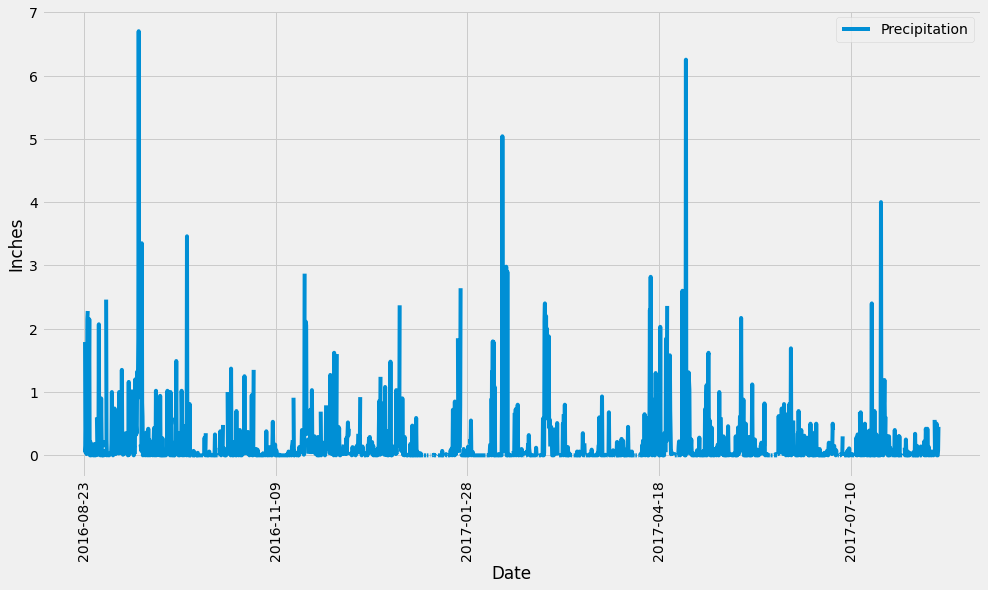

In [42]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
prev_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print('Previoius One Year Date: ', prev_date)

# Perform a query to retrieve the data and precipitation scores
session.query(measurement.date, measurement.prcp).filter(measurement.date >= '2016-08-23').order_by(measurement.date >= '2016-08-23').all()

# print(session.query(func.count(measurement.date>='2016-08-23')).all())

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_date_df = session.query(measurement.date, measurement.prcp).filter(measurement.date >= '2016-08-23').order_by(measurement.date >= '2016-08-23').all()
prcp_date_pandas = pd.DataFrame(prcp_date_df, columns = ['Date', 'Precipitation'])


# Sort the dataframe by date
sorted_df = prcp_date_pandas.sort_values(by=['Date'], ascending=True)
sorted_df.set_index('Date', inplace = True)
sorted_df

# Use Pandas Plotting with Matplotlib to plot the data
sorted_df.plot(use_index = True, y='Precipitation', rot=90, figsize = (15,8))
plt.ylabel('Inches')
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data

# precipitation_mean=sorted_df['Precipitation'].mean()
# precipitation_median=sorted_df['Precipitation'].median()
# precipitation_variance=sorted_df['Precipitation'].var()
# precipitation_std=sorted_df['Precipitation'].std()
# precipitation_sem=sorted_df['Precipitation'].sem()

# summary_stat_df =pd.DataFrame({'Mean Precipitation': precipitation_mean , 'Median precipitation': precipitation_median, 'Precipitation Variance': precipitation_variance , 'Precipitation Standard Deviation': precipitation_std, 'Precipitation Standard Error': precipitation_sem })
# summary_stat_df

precipatation_agg_df = sorted_df['Precipitation'].agg(['mean','median','var','std','sem'])
df = pd.DataFrame(precipatation_agg_df)
df

,Precipitation
mean,0.177279
median,0.020000
var,0.212696
std,0.461190
sem,0.010259


# Exploratory Station Analysis

In [34]:
# Design a query to calculate the total number stations in the dataset
# total_stations = session.query(station.station).distinct().count()
# print(total_stations)

station_count = session.query(func.count(station.station)).all()
print(f"Total number of stations in the dataset: {station_count[0][0]}")

Total number of stations in the dataset: 9


In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
inspector = inspect(engine)
inspector.get_table_names()

columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [31]:
session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).all()

#Tutor question - How to run function to get the data without the tuple format

# station_count=session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).\
# order_by(func.count(measurement.station).desc()).all()

# for x in station_count:
#     print(f"Station: {measurement.station[0][0]}| Number of observations: {mea[0][1]}")


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


active_station_min_temp = session.query(func.min(measurement.tobs)).filter(measurement.station == 'USC00519281').first()
print('Most Active Station Min Temp: ', active_station_min_temp[0])
active_station_max_temp = session.query(func.max(measurement.tobs)).filter(measurement.station == 'USC00519281').first()
print('Most Active Station Max Temp: ', active_station_max_temp[0])
active_station_avg_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').first()
print('Most Active Station Average Temp: ', active_station_avg_temp[0])


Most Active Station Min Temp:  54.0
Most Active Station Max Temp:  85.0
Most Active Station Average Temp:  71.66378066378067


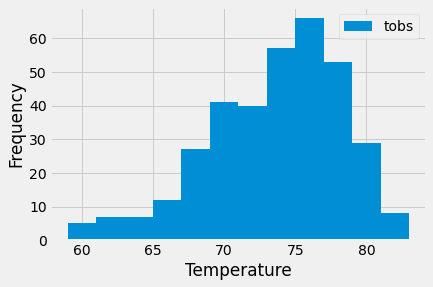

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

session.query(measurement.date, measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date >= '2016-08-23').order_by(measurement.date >= '2016-08-23').all()

query_temp_df = session.query(measurement.date, measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date >= '2016-08-23').order_by(measurement.date >= '2016-08-23').all()
temps_df = pd.DataFrame(query_temp_df, columns = ['Date', 'tobs'])
temps_df.set_index('Date', inplace = True)
temps_df.plot(kind='hist', bins = 12)
plt.xlabel('Temperature')
plt.show()


# Close session

In [17]:
# Close Session
session.close()